<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/Univariate_Comparison_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tips = sns.load_dataset('tips')

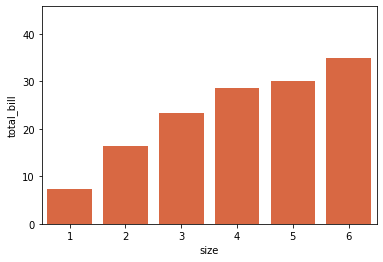

In [0]:
ax = sns.barplot('size', y='total_bill', 
                 data=tips, palette=['#F15B2A'],
                 errwidth=0)

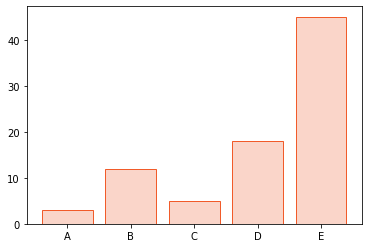

In [0]:
value = [3,12,5,18,45]
label = ('A','B','C','D','E')
pos = np.arange(len(label)) #not arrange/ a range

plt.bar(pos, value,
        color=(240/256,90/256,40/256, 0.25),
        edgecolor='#F15B2A', linewidth=1)

plt.xticks(pos, label)
plt.show()

In [0]:
import pandas as pd

df = pd.DataFrame(data={'time':[6,7,8,9,10],
                        'sun_light':[50,80,100,300,170]})
df.head()

,time,sun_light
0,6,50
1,7,80
2,8,100
3,9,300
4,10,170


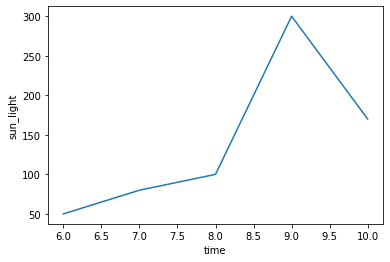

In [0]:
ax = sns.lineplot(x='time', y='sun_light', data= df)

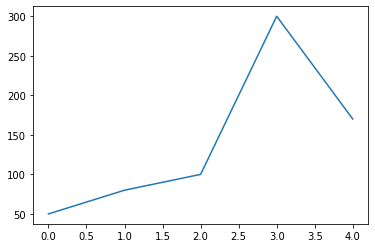

In [0]:
ax = sns.lineplot(data= df['sun_light'])

In [0]:
df['wind_speed']= [46,98,110,70,150]
df.head()

,time,sun_light,wind_speed
0,6,50,46
1,7,80,98
2,8,100,110
3,9,300,70
4,10,170,150


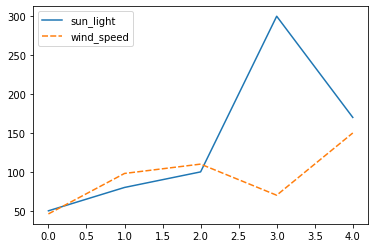

In [0]:
ax = sns.lineplot(data= [df['sun_light'], df['wind_speed']])

In [0]:
pd.melt(df, ['time'])

,time,variable,value
0,6,sun_light,50
1,7,sun_light,80
2,8,sun_light,100
3,9,sun_light,300
4,10,sun_light,170
5,6,wind_speed,46
6,7,wind_speed,98
7,8,wind_speed,110
8,9,wind_speed,70
9,10,wind_speed,150


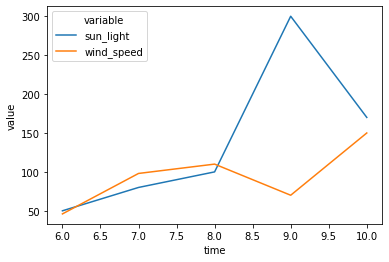

In [0]:
ax = sns.lineplot(x='time', y='value', hue='variable',
                  data=pd.melt(df, ['time']))

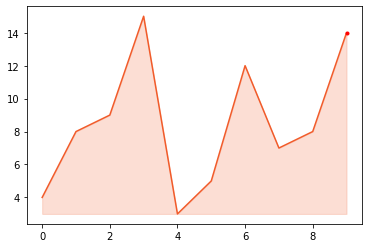

In [0]:
data = [4,8,9,15,3,5,12,7,8,14]

plt.plot(data, color='#F15B2A')

plt.fill_between(range(len(data)),
                 data,
                 len(data)*[min(data)],
                 alpha=0.2,
                 color='#F15B2A')

plt.plot(len(data) -1,
         data[-1],
         'r.')

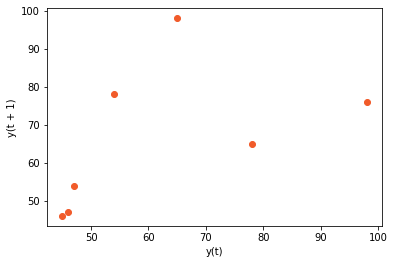

In [0]:
temp_series = pd.DataFrame(data={'temperature':[45,46,47,54,78,65,98,76]})

pd.plotting.lag_plot(temp_series, lag=1, c="#F15B2A")   #number of lags between each representation

In [0]:
 subjects = {'Maths':8, 'Language':7, 'Technology': 10, 'Natural Science': 6}
 df = pd.DataFrame(data=subjects, index=['John'])
 df

,Maths,Language,Technology,Natural Science
John,8,7,10,6


In [0]:
values = df.iloc[0].tolist()
values.append(values[0])
values

[8, 7, 10, 6, 8]

In [0]:
angles = [a/4 * 2 * np.pi for a in range(4)]  #angles in radians make circular area chart
angles.append(angles[0])   #returns starting point so "Natural Science" can have a reference
angles

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

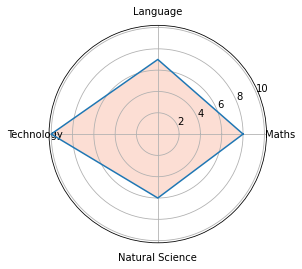

In [0]:
plt.subplot(111, polar=True)
plt.xticks(angles[:-1], subjects.keys())
plt.plot(angles, values)
plt.fill(angles, values, '#F15B2A', alpha=.2)

In [0]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install mapclassify
!pip install geoplot

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 16.7MB/s 
     |████████████████████████████████| 14.7MB 47.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (373 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...


In [0]:
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est'] #formula for per person gdp

df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.056823


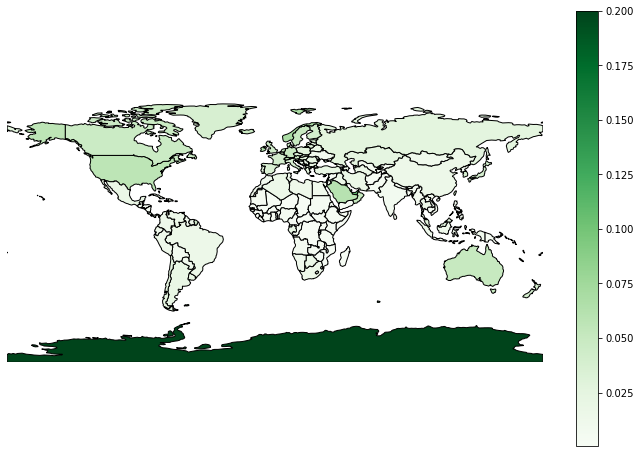

In [0]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(12, 8), legend=True)